In [1]:
import pandas as pd
import fsrs_optimizer

timezone = "Europe/Moscow"
next_day_starts_at = 4
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

In [2]:
from anki.collection import Collection


optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract("./Main_27.04.2023.apkg",
                       filter_out_suspended_cards, filter_out_flags)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False)

col = Collection("./collection.anki21")
decks = [item.name for item in tuple(col.decks.all_names_and_ids()) if sum([col.get_card(cid).reps for cid in col.find_cards(f"deck:{item.name}")]) >= 1000]

def remove_substrings(lst):
    # Sort the list by length of the strings, longest first
    lst.sort(key=len, reverse=True)

    # List to hold the filtered items
    filtered_list = []

    for item in lst:
        # Add the item to the filtered list if it is not a substring of any item already in the filtered list
        if not any(item in other_item for other_item in filtered_list):
            filtered_list.append(item)

    return filtered_list

decks_for_cluster = remove_substrings(decks)
df = pd.read_csv("./revlog_history.tsv", sep="\t")
dfs = [(name, df[df['card_id'].isin(tuple(col.find_cards(f"deck:{name}")))].copy(
)) for name in decks_for_cluster]

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/30507 [00:00<?, ?it/s]

Trainset saved.


In [3]:
ws = []
datasets = []

for name, df in dfs:
    optimizer.define_model()
    S0_dataset = df[df["i"] == 2].copy()
    optimizer.S0_dataset_group = (
        S0_dataset.groupby(by=["r_history", "delta_t"], group_keys=False)
        .agg({"y": ["mean", "count"]})
        .reset_index()
    )
    optimizer.pretrain(df.copy(), verbose=False)
    optimizer.train(verbose=False)
    datasets.append(optimizer.dataset.copy())
    ws.append(optimizer.w)

Pretrain finished!


  0%|          | 0/30914 [00:00<?, ?it/s]

Tensorized!
TRAIN: 23676 TEST: 7238
dataset built


train:   0%|          | 0/110575 [00:00<?, ?it/s]

TRAIN: 24231 TEST: 6683
dataset built


train:   0%|          | 0/110440 [00:00<?, ?it/s]

TRAIN: 24913 TEST: 6001
dataset built


train:   0%|          | 0/106970 [00:00<?, ?it/s]

TRAIN: 25490 TEST: 5424
dataset built


train:   0%|          | 0/109870 [00:00<?, ?it/s]

TRAIN: 25346 TEST: 5568
dataset built


train:   0%|          | 0/110045 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/959 [00:00<?, ?it/s]

Tensorized!
TRAIN: 698 TEST: 261
dataset built


train:   0%|          | 0/3245 [00:00<?, ?it/s]

TRAIN: 771 TEST: 188
dataset built


train:   0%|          | 0/2995 [00:00<?, ?it/s]

TRAIN: 770 TEST: 189
dataset built


train:   0%|          | 0/3210 [00:00<?, ?it/s]

TRAIN: 800 TEST: 159
dataset built


train:   0%|          | 0/3140 [00:00<?, ?it/s]

TRAIN: 797 TEST: 162
dataset built


train:   0%|          | 0/3150 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/22598 [00:00<?, ?it/s]

Tensorized!
TRAIN: 18302 TEST: 4296
dataset built


train:   0%|          | 0/83335 [00:00<?, ?it/s]

TRAIN: 18318 TEST: 4280
dataset built


train:   0%|          | 0/83910 [00:00<?, ?it/s]

TRAIN: 18391 TEST: 4207
dataset built


train:   0%|          | 0/83850 [00:00<?, ?it/s]

TRAIN: 17695 TEST: 4903
dataset built


train:   0%|          | 0/84040 [00:00<?, ?it/s]

TRAIN: 17686 TEST: 4912
dataset built


train:   0%|          | 0/84125 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/1341 [00:00<?, ?it/s]

Tensorized!
TRAIN: 1071 TEST: 270
dataset built


train:   0%|          | 0/5240 [00:00<?, ?it/s]

TRAIN: 1073 TEST: 268
dataset built


train:   0%|          | 0/5175 [00:00<?, ?it/s]

TRAIN: 1073 TEST: 268
dataset built


train:   0%|          | 0/5065 [00:00<?, ?it/s]

TRAIN: 1073 TEST: 268
dataset built


train:   0%|          | 0/5070 [00:00<?, ?it/s]

TRAIN: 1074 TEST: 267
dataset built


train:   0%|          | 0/5070 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/5927 [00:00<?, ?it/s]

Tensorized!
TRAIN: 4677 TEST: 1250
dataset built


train:   0%|          | 0/21225 [00:00<?, ?it/s]

TRAIN: 4837 TEST: 1090
dataset built


train:   0%|          | 0/20955 [00:00<?, ?it/s]

TRAIN: 4558 TEST: 1369
dataset built


train:   0%|          | 0/21295 [00:00<?, ?it/s]

TRAIN: 4798 TEST: 1129
dataset built


train:   0%|          | 0/21170 [00:00<?, ?it/s]

TRAIN: 4838 TEST: 1089
dataset built


train:   0%|          | 0/20955 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/1287 [00:00<?, ?it/s]

Tensorized!
TRAIN: 1028 TEST: 259
dataset built


train:   0%|          | 0/5040 [00:00<?, ?it/s]

TRAIN: 1028 TEST: 259
dataset built


train:   0%|          | 0/5010 [00:00<?, ?it/s]

TRAIN: 1031 TEST: 256
dataset built


train:   0%|          | 0/4935 [00:00<?, ?it/s]

TRAIN: 1030 TEST: 257
dataset built


train:   0%|          | 0/4925 [00:00<?, ?it/s]

TRAIN: 1031 TEST: 256
dataset built


train:   0%|          | 0/4930 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/15174 [00:00<?, ?it/s]

Tensorized!
TRAIN: 10670 TEST: 4504
dataset built


train:   0%|          | 0/44220 [00:00<?, ?it/s]

TRAIN: 11487 TEST: 3687
dataset built


train:   0%|          | 0/44210 [00:00<?, ?it/s]

TRAIN: 12950 TEST: 2224
dataset built


train:   0%|          | 0/44120 [00:00<?, ?it/s]

TRAIN: 12955 TEST: 2219
dataset built


train:   0%|          | 0/44120 [00:00<?, ?it/s]

TRAIN: 12634 TEST: 2540
dataset built


train:   0%|          | 0/44190 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/2288 [00:00<?, ?it/s]

Tensorized!
TRAIN: 1830 TEST: 458
dataset built


train:   0%|          | 0/9025 [00:00<?, ?it/s]

TRAIN: 1831 TEST: 457
dataset built


train:   0%|          | 0/8915 [00:00<?, ?it/s]

TRAIN: 1831 TEST: 457
dataset built


train:   0%|          | 0/8810 [00:00<?, ?it/s]

TRAIN: 1831 TEST: 457
dataset built


train:   0%|          | 0/8815 [00:00<?, ?it/s]

TRAIN: 1829 TEST: 459
dataset built


train:   0%|          | 0/8795 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/52261 [00:00<?, ?it/s]

Tensorized!
TRAIN: 39194 TEST: 13067
dataset built


train:   0%|          | 0/170850 [00:00<?, ?it/s]

TRAIN: 40708 TEST: 11553
dataset built


train:   0%|          | 0/170740 [00:00<?, ?it/s]

TRAIN: 43304 TEST: 8957
dataset built


train:   0%|          | 0/167770 [00:00<?, ?it/s]

TRAIN: 42046 TEST: 10215
dataset built


train:   0%|          | 0/170625 [00:00<?, ?it/s]

TRAIN: 43792 TEST: 8469
dataset built


train:   0%|          | 0/170235 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/4579 [00:00<?, ?it/s]

Tensorized!
TRAIN: 3540 TEST: 1039
dataset built


train:   0%|          | 0/17310 [00:00<?, ?it/s]

TRAIN: 3688 TEST: 891
dataset built


train:   0%|          | 0/16855 [00:00<?, ?it/s]

TRAIN: 3688 TEST: 891
dataset built


train:   0%|          | 0/17200 [00:00<?, ?it/s]

TRAIN: 3699 TEST: 880
dataset built


train:   0%|          | 0/16955 [00:00<?, ?it/s]

TRAIN: 3701 TEST: 878
dataset built


train:   0%|          | 0/16920 [00:00<?, ?it/s]


Training finished!


0.3559487072632504
R-squared: 0.8869
RMSE: 0.0323
MAE: 0.0179
ICI: 0.0178
E50: 0.0112
E90: 0.0390
EMax: 0.3100
[0.20562315 0.76555596]

Last rating: 1
R-squared: 0.6255
RMSE: 0.0621
MAE: 0.0535
ICI: 0.0510
E50: 0.0505
E90: 0.0906
EMax: 0.2043
[0.29784287 0.63075832]

Last rating: 2
R-squared: 0.9150
RMSE: 0.0291
MAE: 0.0220
ICI: 0.0195
E50: 0.0216
E90: 0.0261
EMax: 0.2244
[0.1376804  0.82446593]

Last rating: 3
R-squared: 0.8303
RMSE: 0.0363
MAE: 0.0155
ICI: 0.0142
E50: 0.0041
E90: 0.0387
EMax: 0.3352
[0.23631617 0.74087722]

Last rating: 4
R-squared: -0.1397
RMSE: 0.0309
MAE: 0.0199
ICI: 0.0197
E50: 0.0125
E90: 0.0358
EMax: 0.1741
[0.4337723  0.56824459]


({'R-squared': 0.8868648839573646,
  'RMSE': 0.032295411508997375,
  'MAE': 0.017919799915858674,
  'ICI': 0.01779324588015716},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

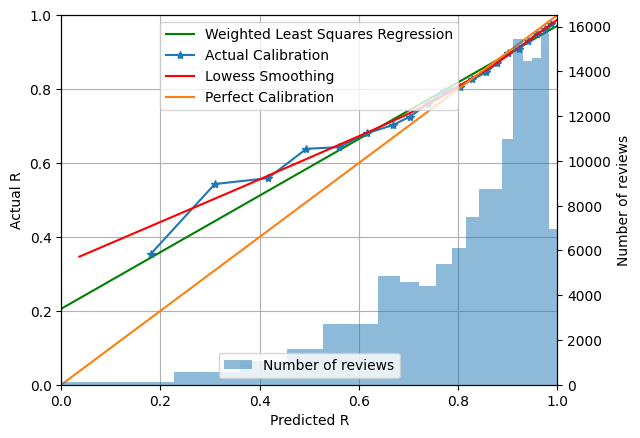

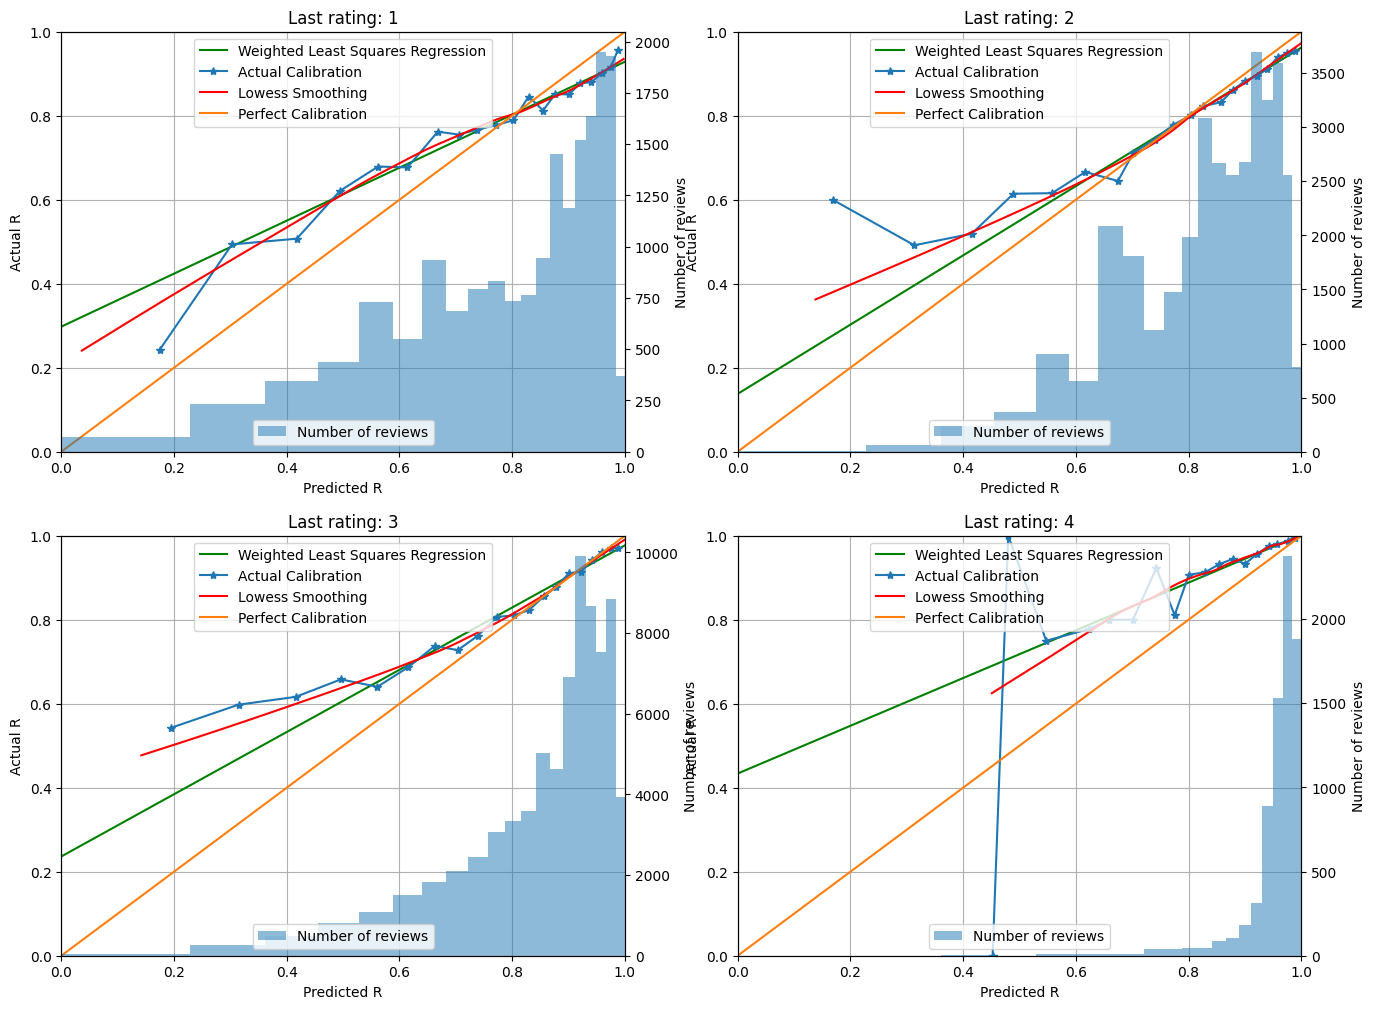

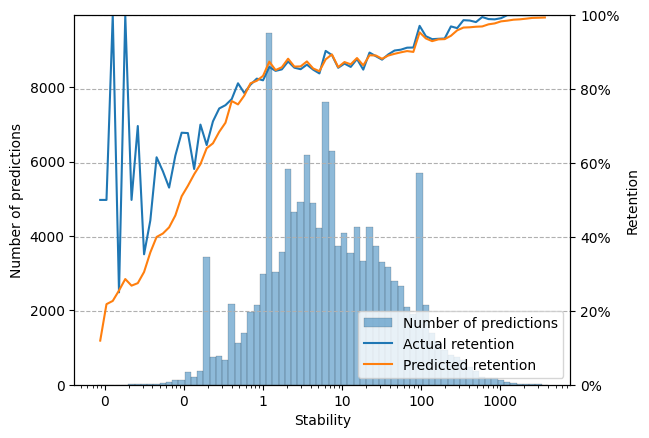

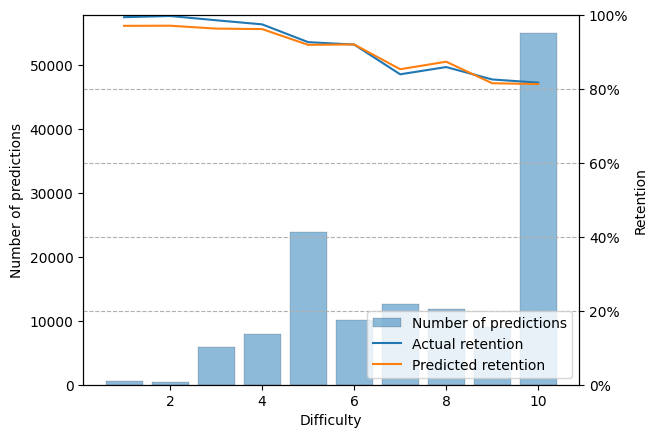

In [4]:
from fsrs_optimizer import Collection, power_forgetting_curve
from sklearn.metrics import log_loss

results = []

for w, dataset in zip(ws, datasets):
    my_collection = Collection(w)
    stabilities, difficulties = my_collection.batch_predict(dataset)
    dataset["stability"] = stabilities
    dataset["difficulty"] = difficulties
    dataset["p"] = power_forgetting_curve(dataset["delta_t"], dataset["stability"])
    results.append(dataset.copy())

dataset_join = pd.concat(results, ignore_index=True)
print(log_loss(dataset_join["y"], dataset_join["p"]))
optimizer.calibration_graph(dataset_join)

Pretrain finished!


  0%|          | 0/137328 [00:00<?, ?it/s]

Tensorized!
TRAIN: 110917 TEST: 26411
dataset built


train:   0%|          | 0/505755 [00:00<?, ?it/s]

TRAIN: 110917 TEST: 26411
dataset built


train:   0%|          | 0/481240 [00:00<?, ?it/s]

TRAIN: 110918 TEST: 26410
dataset built


train:   0%|          | 0/452860 [00:00<?, ?it/s]

TRAIN: 108280 TEST: 29048
dataset built


train:   0%|          | 0/459970 [00:00<?, ?it/s]

TRAIN: 108280 TEST: 29048
dataset built


train:   0%|          | 0/439815 [00:00<?, ?it/s]


Training finished!
(0.36974856536229317, 0.3664640541107737)
R-squared: 0.7972
RMSE: 0.0384
MAE: 0.0245
ICI: 0.0232
E50: 0.0162
E90: 0.0444
EMax: 0.3348
[0.25557381 0.70534737]

Last rating: 1
R-squared: 0.5874
RMSE: 0.0578
MAE: 0.0504
ICI: 0.0498
E50: 0.0481
E90: 0.0752
EMax: 0.2087
[0.30615824 0.61781096]

Last rating: 2
R-squared: 0.7429
RMSE: 0.0419
MAE: 0.0351
ICI: 0.0327
E50: 0.0291
E90: 0.0398
EMax: 0.3190
[0.215807   0.72700779]

Last rating: 3
R-squared: 0.7174
RMSE: 0.0420
MAE: 0.0227
ICI: 0.0211
E50: 0.0126
E90: 0.0487
EMax: 0.3416
[0.29773486 0.66948506]

Last rating: 4
R-squared: -0.7799
RMSE: 0.0335
MAE: 0.0170
ICI: 0.0178
E50: 0.0085
E90: 0.0355
EMax: 0.1706
[0.5487705  0.44691402]


({'R-squared': 0.7972134285485798,
  'RMSE': 0.03839192083219616,
  'MAE': 0.024538458665087363,
  'ICI': 0.02322605899311686},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

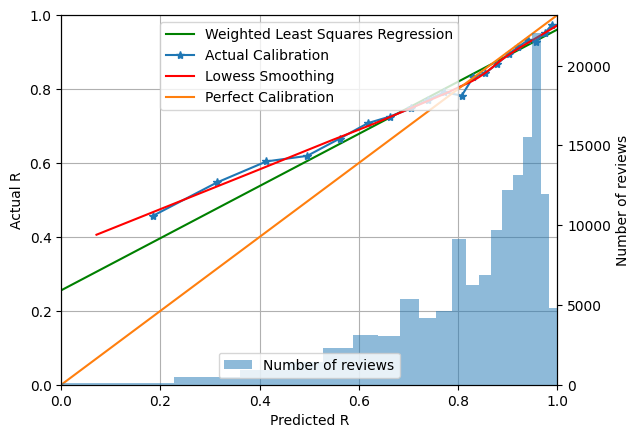

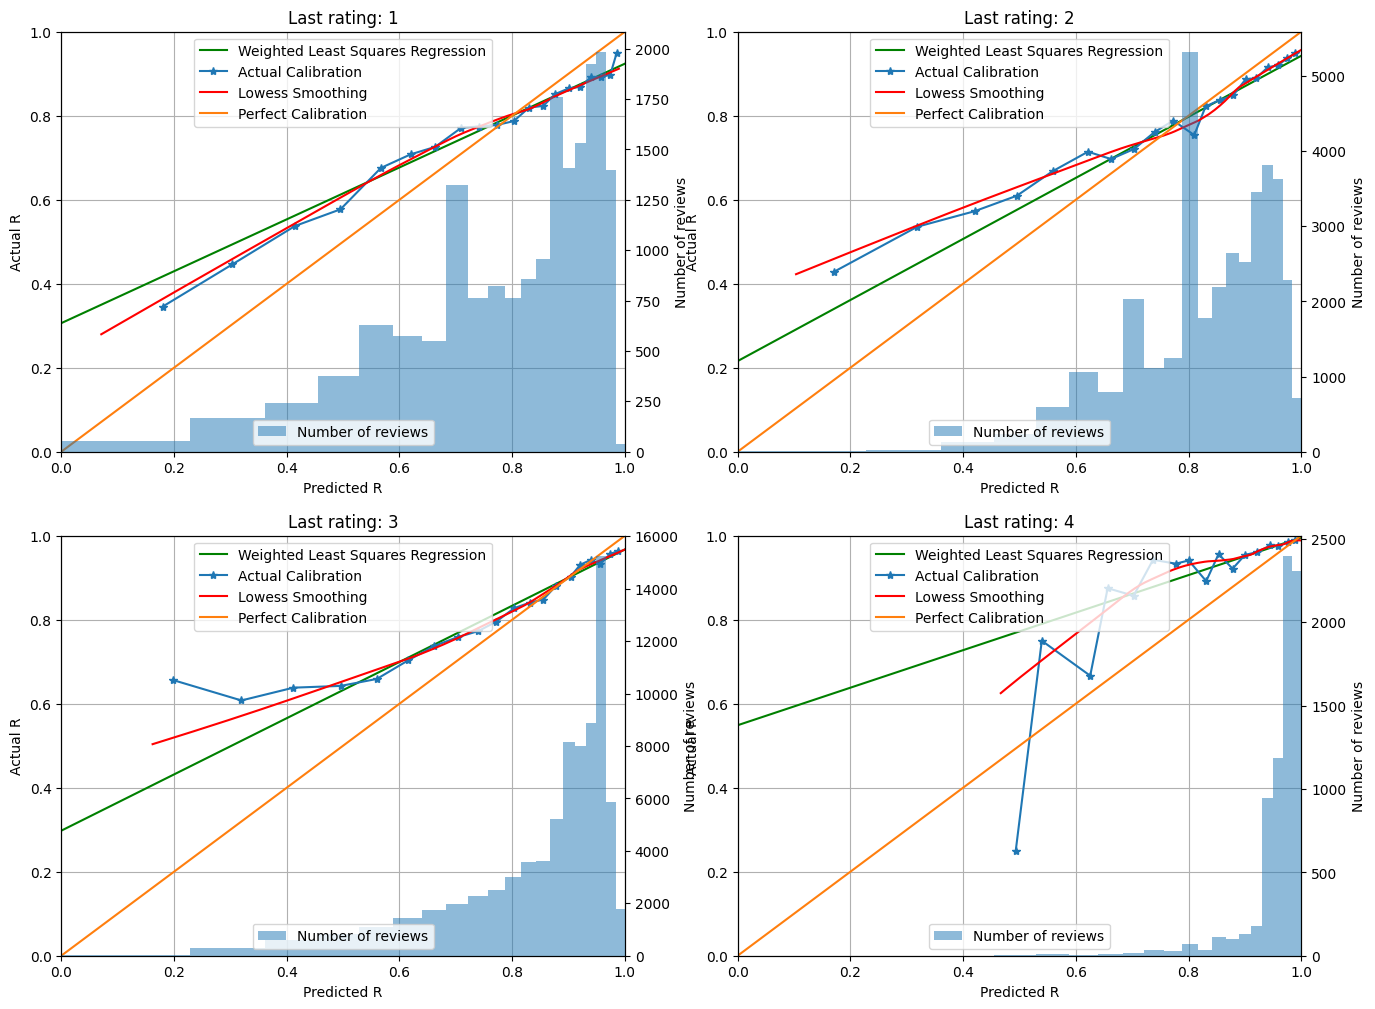

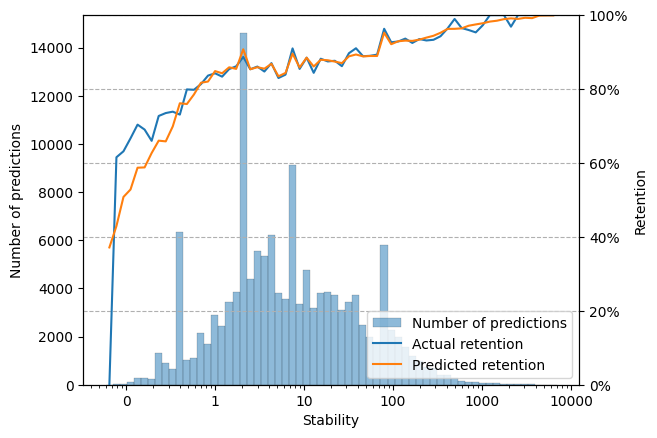

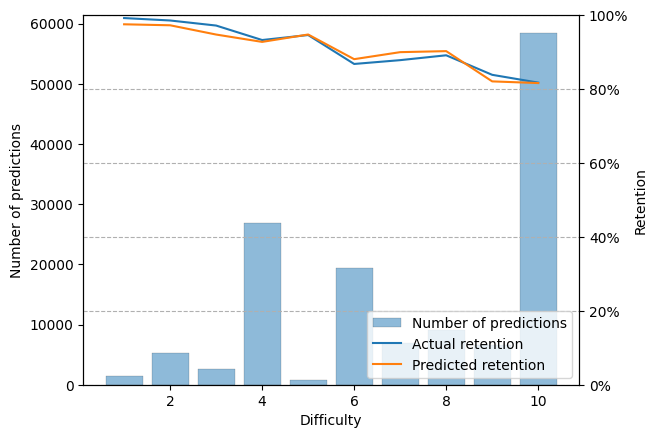

In [5]:
optimizer.define_model()
S0_dataset = dataset_join[dataset_join["i"] == 2].copy()
optimizer.S0_dataset_group = (
    S0_dataset.groupby(by=["r_history", "delta_t"], group_keys=False)
    .agg({"y": ["mean", "count"]})
    .reset_index()
)
optimizer.pretrain(dataset_join.copy(), verbose=False)
optimizer.train(verbose=False)
print(optimizer.evaluate())
optimizer.calibration_graph()

In [7]:
for w, (name, _) in zip(ws, dfs):
    print(name, w, sep="\n")

print("Global", optimizer.w, sep="\n")

Main::Japanese::WaniKani::Vocabulary
[0.4687, 0.4687, 2.1115, 17.8016, 5.2422, 1.9939, 0.8224, 0.0173, 1.8444, 0.1692, 1.2382, 2.2365, 0.0227, 0.239, 1.188, 0.1496, 3.648]
Main::Programming::Python::Syntax
[0.6723, 0.7773, 0.9663, 7.9731, 5.0648, 1.2414, 0.9747, 0.0, 1.6639, 0.1544, 1.0384, 2.1394, 0.0863, 0.3197, 1.2382, 0.2053, 2.9115]
Main::Japanese::WaniKani::Kanji
[0.2228, 0.2228, 1.0005, 11.9264, 5.6278, 2.0568, 1.023, 0.0655, 1.7117, 0.2412, 1.126, 2.2718, 0.0138, 0.1695, 1.4707, 0.1889, 3.698]
Main::Science::Mechanisms
[0.6227, 1.2546, 3.5878, 3.5878, 5.2336, 1.0334, 0.8933, 0.0129, 1.5546, 0.2388, 0.9334, 2.1032, 0.1073, 0.2974, 1.3551, 0.1389, 2.6073]
Main::Science::Chemistry
[0.6812, 0.836, 1.9871, 24.608, 4.6979, 1.157, 0.9321, 0.0, 1.8109, 0.1, 1.1626, 2.0293, 0.1453, 0.2764, 1.2341, 0.2399, 3.2826]
Main::Geography::Россия
[0.0295, 0.1014, 0.6455, 7.9731, 5.2739, 1.2711, 0.9555, 0.0, 1.4349, 0.2261, 0.8073, 2.0235, 0.187, 0.2182, 1.2549, 0.056, 2.7854]
Main::Japanese::Anim